# Importing Libraries 

In [5]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import sklearn 
import scipy 
from sklearn.metrics import classification_report, accuracy_score

# Importing Libraries for Outlier Detection 

In [6]:
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM  

# Reading The Dataset 

In [7]:
df = pd.read_csv(r"D:\Python Resources\Credit+Card+Fraud+Using+Pycaret+-Code+and+Files\Code and Files\creditcard.csv")

In [8]:
df.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0


# Data Analysis 

In [9]:
df.shape

(284807, 31)

In [10]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

# Checking The Distribution of Normal & Fraud Cases 

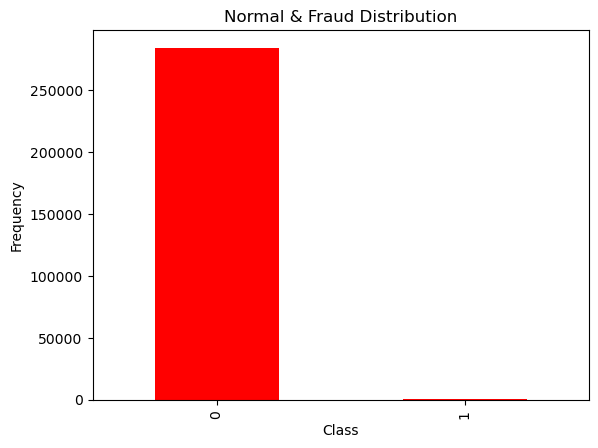

In [11]:
fraud_distribution = pd.value_counts(df['Class'], sort = True)
fraud_distribution.plot(kind = 'bar', color='r')
plt.title("Normal & Fraud Distribution")
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.show()

In [12]:
fraudalent_transaction = df[df['Class']==1]
normal_transaction = df[df['Class']==0]

In [13]:
fraudalent_transaction.shape

(492, 31)

In [14]:
normal_transaction.shape

(284315, 31)

# Finding Out The Average Transaction Amount in Both The Cases 

In [15]:
fraudalent_transaction['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [16]:
normal_transaction['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

# Visual Analysis 

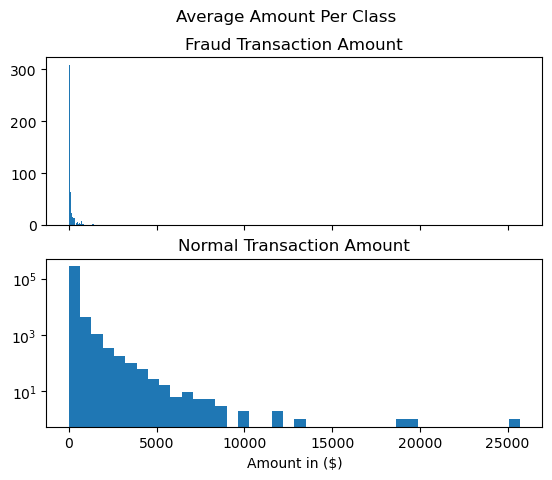

In [17]:
graph, (plot1, plot2) = plt.subplots(2,1,sharex=True)
graph.suptitle('Average Amount Per Class')
bins = 40

plot1.hist(fraudalent_transaction['Amount'], bins = bins)
plot1.set_title('Fraud Transaction Amount')

plot2.hist(normal_transaction['Amount'], bins = bins)
plot2.set_title('Normal Transaction Amount')

plt.xlabel('Amount in ($)')
plt.yscale('log')


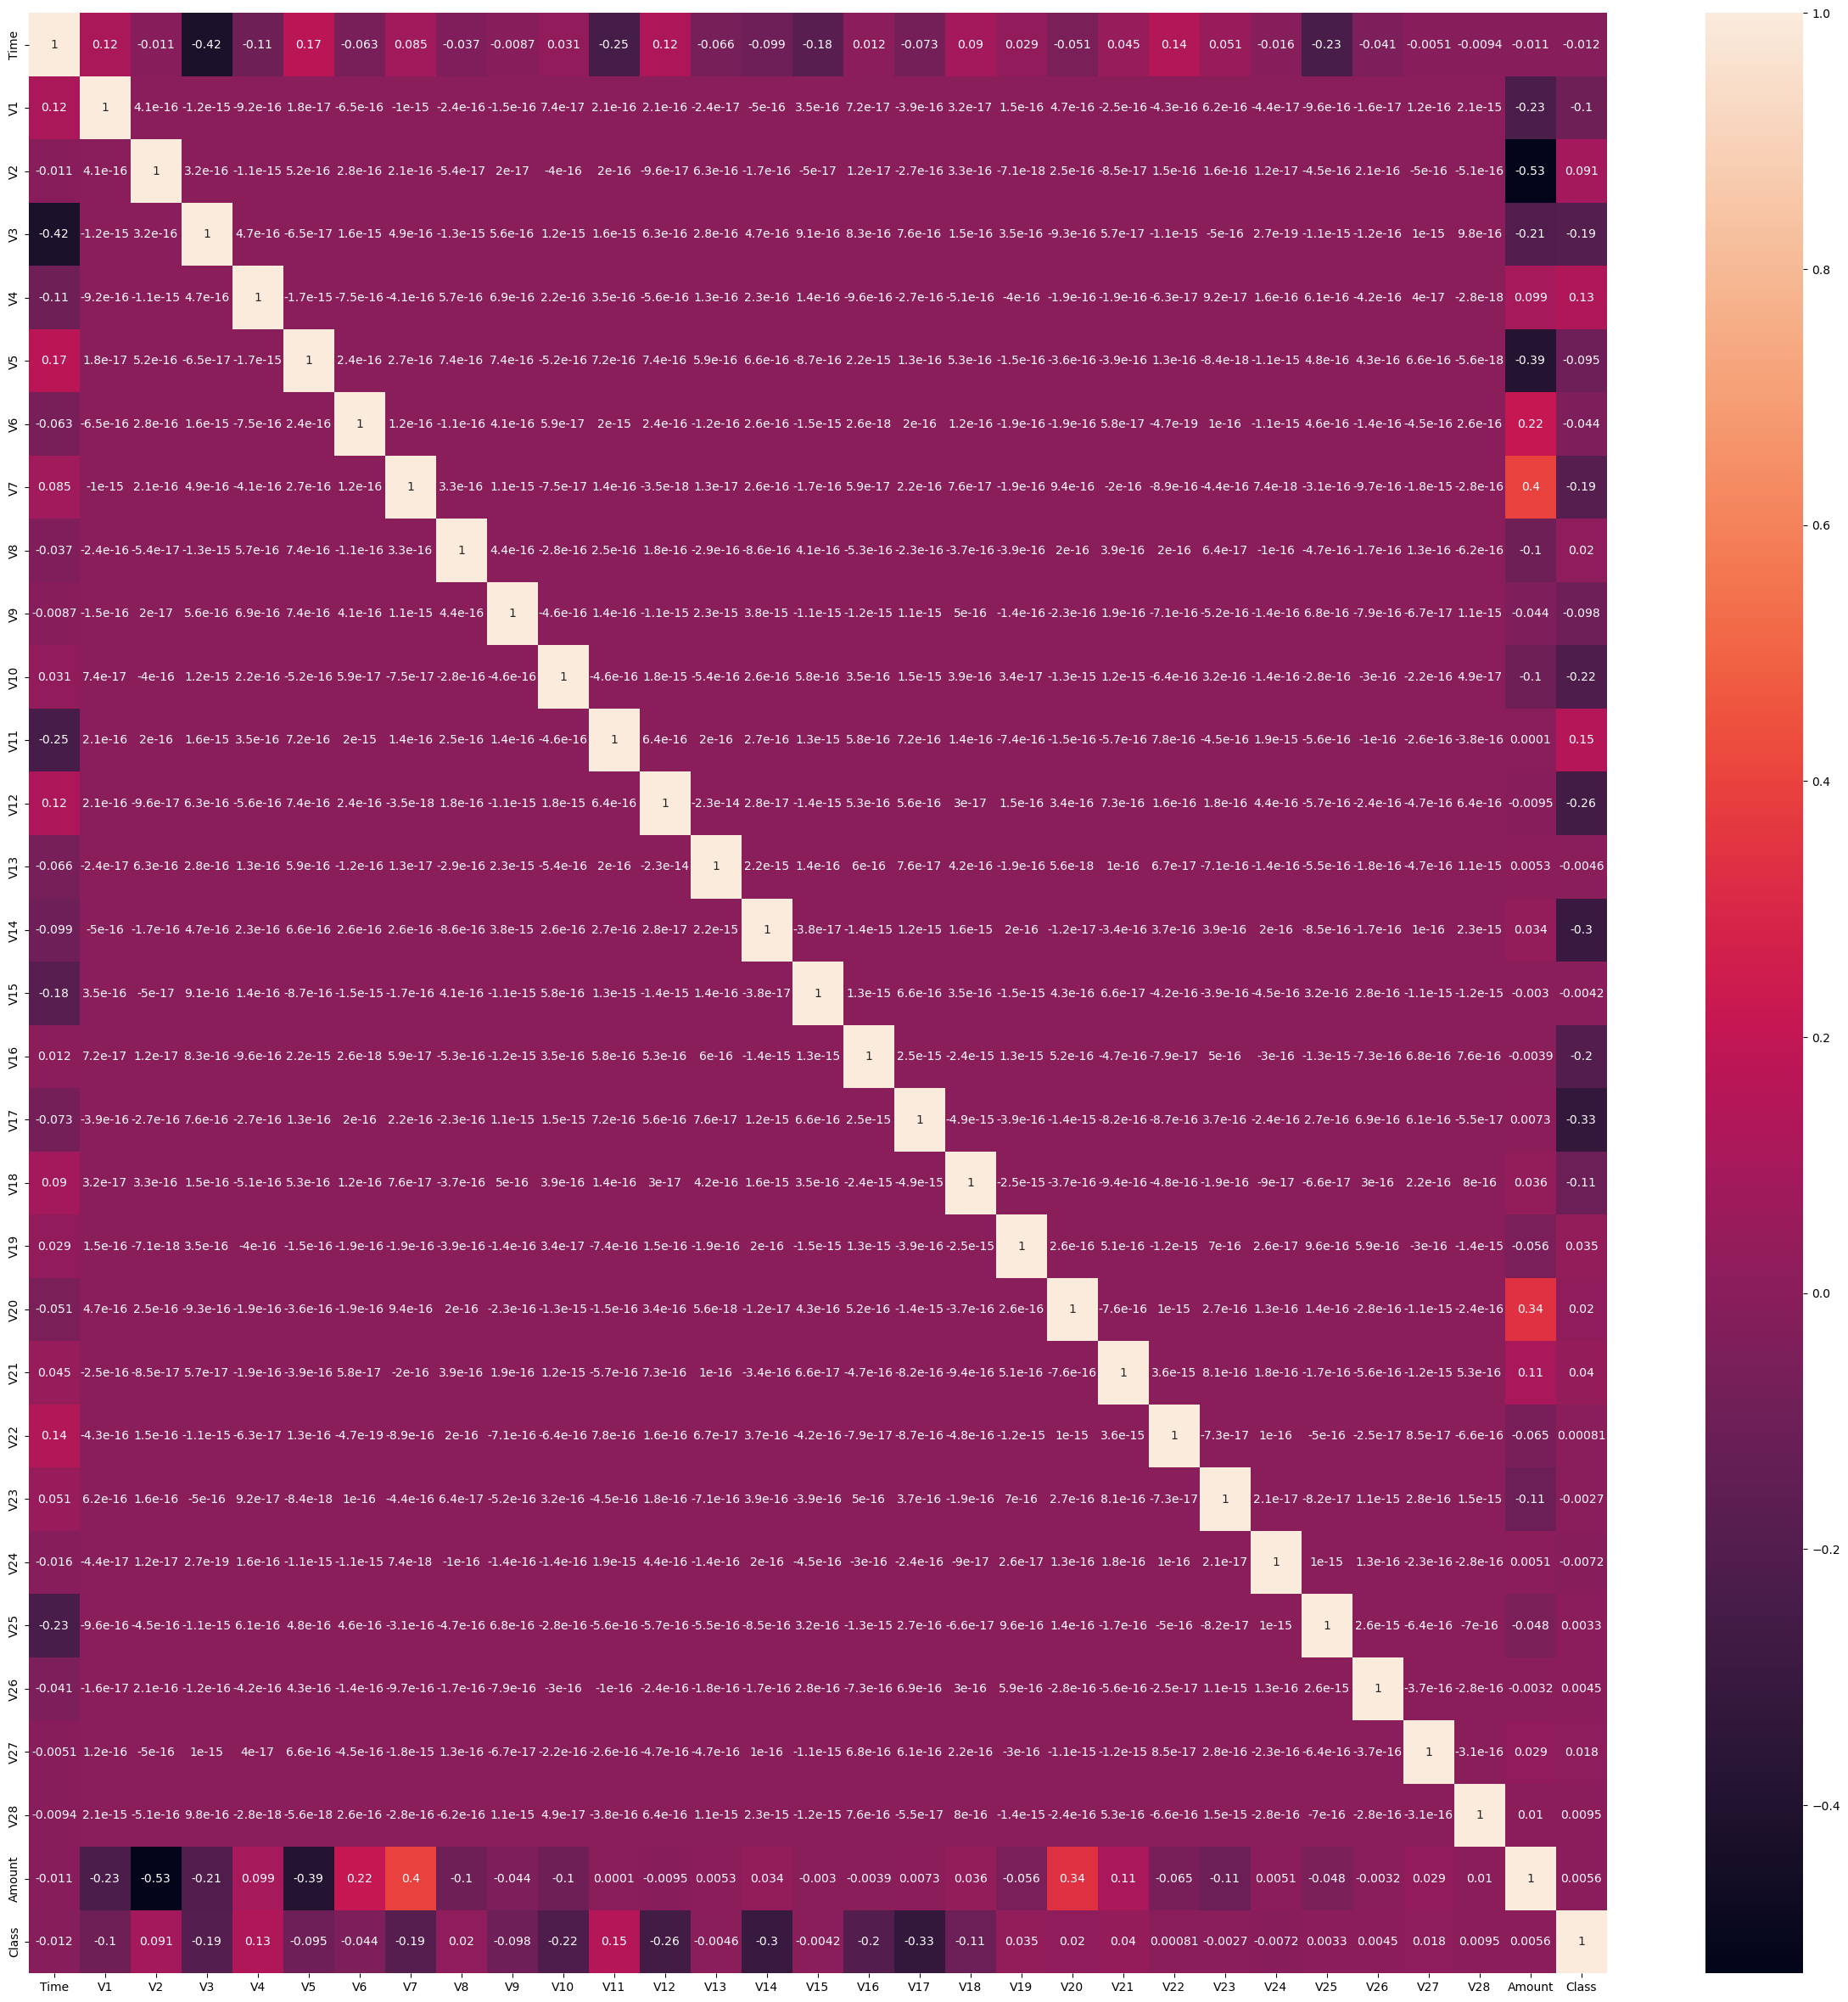

In [18]:
df.corr()
plt.figure(figsize=(30,30))
g=sns.heatmap(df.corr(),annot = True)

# Creating Dependent & Independent Features 

In [19]:
columns = df.columns.tolist()
columns = [var for var in columns if var not in ['Class']]
target = "Class"
x = df[columns]
y = df[target]

In [20]:
x.shape

(284807, 30)

In [21]:
y.shape

(284807,)

In [22]:
y.head(3)

0    0
1    0
2    0
Name: Class, dtype: int64

In [23]:
x.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


# Model Building 

# Splitting The Data 

In [24]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 42)

# Isolation Forest

In [25]:
iso_forest = IsolationForest(n_estimators = 100, max_samples = len(x_train), random_state = 0, verbose = 0)

In [26]:
iso_forest.fit(x_train,y_train)

IsolationForest(max_samples=199364, random_state=0)

In [27]:
y_pred = iso_forest.predict(x_test)

In [28]:
y_pred

array([-1,  1,  1, ...,  1,  1,  1])

# Minus one represents the Outlier 

# Mapping The Values as We Want to Have Output in 0 & 1 

In [29]:
y_pred[y_pred == 1] = 0 
y_pred[y_pred == -1] = 1 

# Accuracy Score & Matrix 

In [30]:
print(accuracy_score(y_test,y_pred))

0.9978465175614152


In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.37      0.51      0.43       136

    accuracy                           1.00     85443
   macro avg       0.69      0.76      0.72     85443
weighted avg       1.00      1.00      1.00     85443



In [32]:
from sklearn.metrics import confusion_matrix 

In [33]:
confusion_matrix(y_test,y_pred)

array([[85189,   118],
       [   66,    70]], dtype=int64)

# Print Errors That Our Model Has :

In [34]:
n_errors = (y_pred != y_test).sum()
print("Isolation Forest Has {} errors.".format(n_errors))

Isolation Forest Has 184 errors.


# OneClassSVM

In [35]:
from sklearn.svm import OneClassSVM

In [56]:
from sklearn.utils import resample
x_downsampled = resample(x,replace = False, n_samples = 10000, random_state = 42)
y_downsampled = resample(y,replace = False, n_samples = 10000, random_state = 42)

In [57]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_downsampled, y_downsampled, test_size = 0.20, random_state = 41)

In [85]:
svm= OneClassSVM(kernel='linear', degree=3, gamma=0.1, nu=0.05, max_iter = -1)

In [86]:
x_train1.shape

(8000, 30)

In [87]:
y_train1.shape

(8000,)

In [88]:
svm.fit(x_train1,y_train1)

OneClassSVM(gamma=0.1, kernel='linear', nu=0.05)

In [90]:
y_pred_1 = svm.predict(x_test)

# Mapping Our Results To Zero & One 

In [91]:
y_pred_1[y_pred_1 == 1] = 0

y_pred_1[y_pred_1 == -1] = 1


# Accuracy Score & Matrix 

In [92]:
print(classification_report(y_test,y_pred_1))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       200
           1       0.00      0.00      0.00         0

    accuracy                           0.96       200
   macro avg       0.50      0.48      0.49       200
weighted avg       1.00      0.96      0.98       200



C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [93]:
print(accuracy_score(y_test,y_pred_1))

0.96


In [94]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred_1,y_test)


array([[192,   0],
       [  8,   0]], dtype=int64)

In [96]:
n_errors1 = (y_pred_1 != y_test).sum()
print("Support Vector Machine Has {} errors".format(n_errors1))

Support Vector Machine Has 8 errors
